3.2 Handling missing data 

caused by 1 of 2 reasons <br />
1. missing data randomly
    - no relationship between missing observation in two/more columns 
2. not random
    - attribute the missing data to a logical reason. 
    - depressed patients are more likely to leave empty fields in forms 

3.2.1 handline missing numerical data  <br />
    - imputation: replacing missing numerical data with statistical or algorithmic techniques  <br />
    - the simpliest way is Complete Case Analysis (CCA)  <br />
    - ie, only consider data that has no missing data  <br />

mean and median imputation

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns 

plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")

titanic_data = sns.load_dataset('titanic')
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


filter numeric columns

In [3]:
titanic_data = titanic_data[['age','pclass','survived','fare']]
titanic_data.head()

,age,pclass,survived,fare
0,22.0,3,0,7.2500
1,38.0,1,1,71.2833
2,26.0,3,1,7.9250
3,35.0,1,1,53.1000
4,35.0,3,0,8.0500


percentage of missing values from numeric columns

In [4]:
titanic_data.isnull().mean()

age         0.198653
pclass      0.000000
survived    0.000000
fare        0.000000
dtype: float64

In [5]:
median = titanic_data['age'].median()
print(median)

mean = titanic_data['age'].mean()
print(mean)

#alternatively
#mean = titanic_data.age.mean()
#median = titanic_data.age.median()

28.0
29.69911764705882


plotting kernel density plots 

In [6]:
import numpy as np 
titanic_data['Median_Age'] = titanic_data['age'].fillna(median)

titanic_data['Mean_Age'] = titanic_data['age'].fillna(mean)

titanic_data['Mean_Age'] = np.round(titanic_data['Mean_Age'],1)

#titanic_data.drop('Mean_Age_r', axis=1)
titanic_data.head(20)

,age,pclass,survived,fare,Median_Age,Mean_Age
0,22.0,3,0,7.2500,22.0,22.0
1,38.0,1,1,71.2833,38.0,38.0
2,26.0,3,1,7.9250,26.0,26.0
3,35.0,1,1,53.1000,35.0,35.0
4,35.0,3,0,8.0500,35.0,35.0
5,NaN,3,0,8.4583,28.0,29.7
6,54.0,1,0,51.8625,54.0,54.0
7,2.0,3,0,21.0750,2.0,2.0
8,27.0,3,1,11.1333,27.0,27.0
9,14.0,2,1,30.0708,14.0,14.0


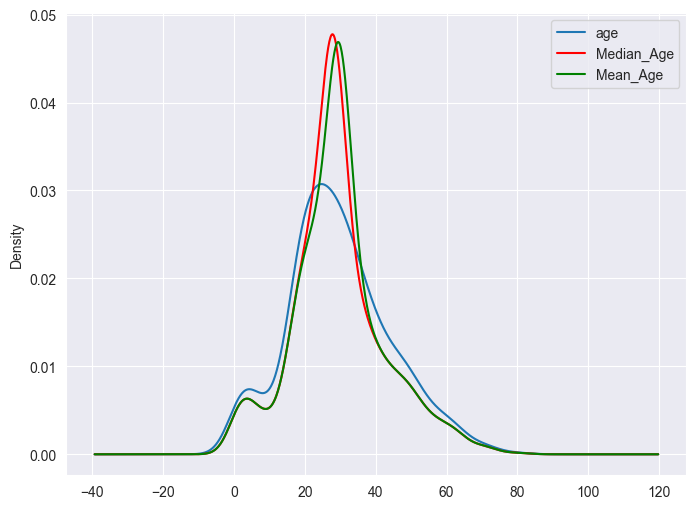

In [7]:
fig = plt.figure()
ax = fig.add_subplot()

titanic_data['age'].plot(kind='kde', ax=ax)

titanic_data['Median_Age'].plot(kind='kde', ax=ax, color='red')

titanic_data['Mean_Age'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels, loc='best')

plt.show()


End of Distribution Imputation

for randomly missing data, the most commonly used techniques are end of distribution/end of tail imputation

In [8]:
import matplotlib.pyplot as plt 
import seaborn as sns 

plt.rcParams['figure.figsize'] = [8,6]
sns.set_style('darkgrid')
 
titanic_data = sns.load_dataset('titanic')

titanic_data = titanic_data[['age','pclass','survived','fare']]

titanic_data.isnull().mean()


age         0.198653
pclass      0.000000
survived    0.000000
fare        0.000000
dtype: float64

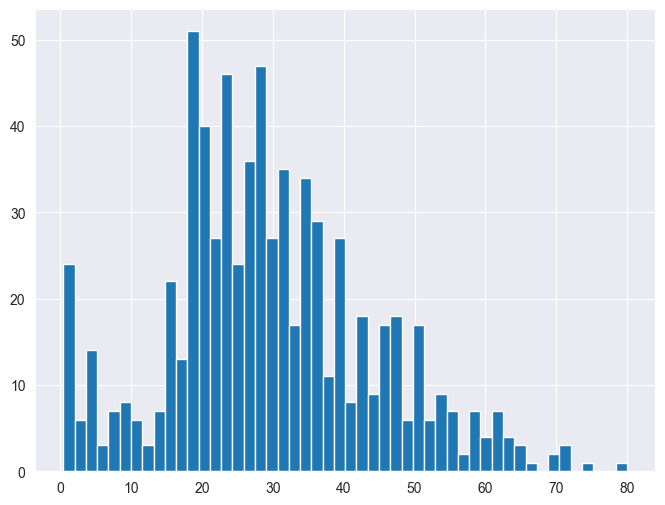

In [9]:
titanic_data['age'].hist(bins=50)
plt.show()

In [10]:
eod_value_up = titanic_data['age'].mean() + 3 * titanic_data['age'].std()
eod_value_down = titanic_data['age'].mean() - 3 * titanic_data['age'].std()
print(titanic_data['age'].mean())
print(3*titanic_data['age'].std())
print(eod_value_up)
print(eod_value_down)
eod_value = eod_value_up


29.69911764705882
43.57949199700212
73.27860964406094
-13.880374349943303


In [11]:
titanic_data['age'].skew()

0.38910778230082704

In [12]:
import numpy as np 

titanic_data['age_eod'] = titanic_data['age'].fillna(eod_value)

titanic_data.head(20)

,age,pclass,survived,fare,age_eod
0,22.0,3,0,7.2500,22.00000
1,38.0,1,1,71.2833,38.00000
2,26.0,3,1,7.9250,26.00000
3,35.0,1,1,53.1000,35.00000
4,35.0,3,0,8.0500,35.00000
5,NaN,3,0,8.4583,73.27861
6,54.0,1,0,51.8625,54.00000
7,2.0,3,0,21.0750,2.00000
8,27.0,3,1,11.1333,27.00000
9,14.0,2,1,30.0708,14.00000


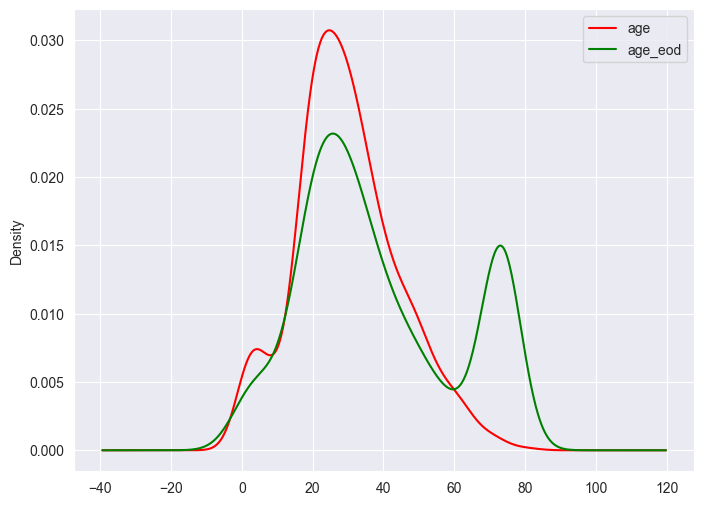

In [13]:
fig = plt.figure()
ax = fig.add_subplot()

titanic_data['age'].plot(kind = 'kde', ax=ax, color = 'red')
titanic_data['age_eod'].plot(kind='kde',ax=ax, color='green')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels, loc='best')
plt.show()

3.2.2 Handling Missing Categorical Data

one of the more common ways of handling missing values in a categorical column is to replace the missing values with the mode of the column

In [14]:
import matplotlib.pyplot as plt 
import seaborn as sns 

plt.rcParams['figure.figsize'] = [8,6]
sns.set_style('darkgrid')

titanic_data = sns.load_dataset('titanic')

titanic_data = titanic_data[['embark_town','age','fare']]

titanic_data.isnull().mean()

embark_town    0.002245
age            0.198653
fare           0.000000
dtype: float64

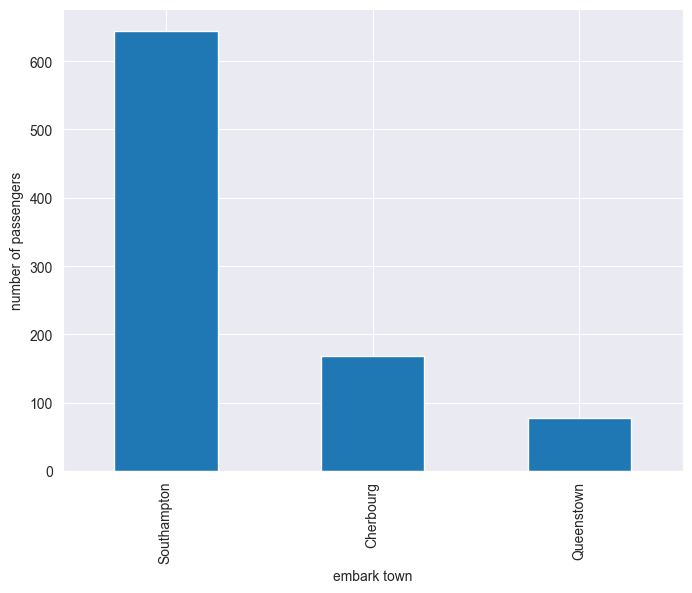

In [15]:
titanic_data['embark_town'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('embark town')
plt.ylabel('number of passengers')
plt.show()

In [16]:
print(titanic_data['embark_town'].mode())
titanic_data['embark_town'].fillna('Southampton', inplace=True)

titanic_data['age'].mode()

0    Southampton
Name: embark_town, dtype: object


0    24.0
Name: age, dtype: float64

In [17]:
titanic_data['Mode_Age'] = titanic_data['age'].fillna(24)
titanic_data.head(20)

,embark_town,age,fare,Mode_Age
0,Southampton,22.0,7.2500,22.0
1,Cherbourg,38.0,71.2833,38.0
2,Southampton,26.0,7.9250,26.0
3,Southampton,35.0,53.1000,35.0
4,Southampton,35.0,8.0500,35.0
5,Queenstown,NaN,8.4583,24.0
6,Southampton,54.0,51.8625,54.0
7,Southampton,2.0,21.0750,2.0
8,Southampton,27.0,11.1333,27.0
9,Cherbourg,14.0,30.0708,14.0


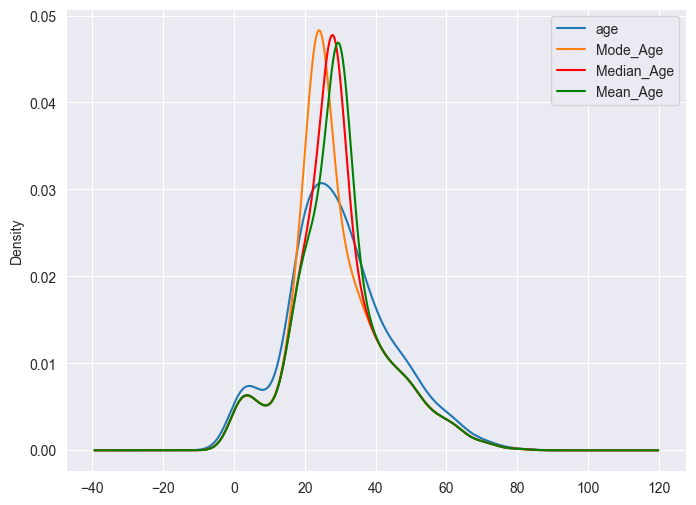

In [18]:
fig = plt.figure()
ax = fig.add_subplot()

titanic_data['age'].plot(kind='kde',ax=ax)

titanic_data['Mode_Age'].plot(kind='kde',ax=ax)

####
titanic_data['Median_Age'] = titanic_data['age'].fillna(median)
titanic_data['Mean_Age'] = titanic_data['age'].fillna(mean)

titanic_data['Median_Age'].plot(kind='kde', ax=ax, color='red')
titanic_data['Mean_Age'].plot(kind='kde', ax=ax, color='green')
######

titanic_data['Mean_Age'] = np.round(titanic_data['Mean_Age'],1)
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')
plt.show()

missing category imputation

In [19]:
titanic_data = sns.load_dataset('titanic')

titanic_data = titanic_data[['embark_town','age','fare']]

titanic_data.isnull().mean()


embark_town    0.002245
age            0.198653
fare           0.000000
dtype: float64

Southampton    644
Cherbourg      168
Queenstown      77
Missing          2
Name: embark_town, dtype: int64


<AxesSubplot: >

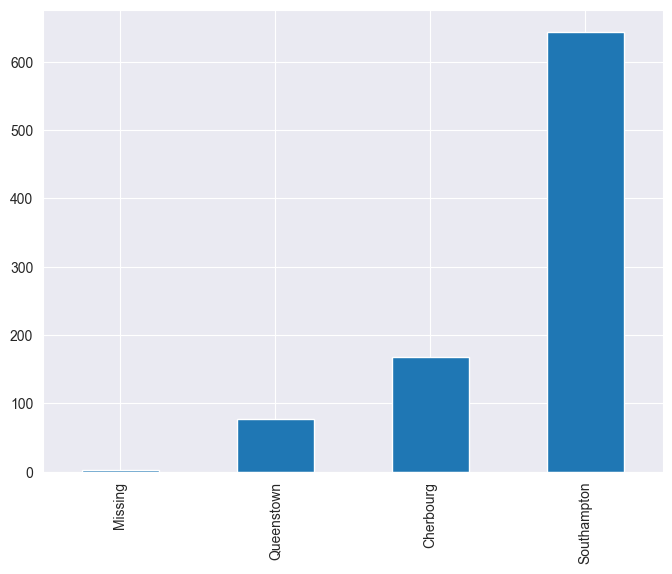

In [20]:
titanic_data['embark_town'].fillna("Missing",inplace=True)

print(titanic_data['embark_town'].value_counts())#.sort_values().plot.bar()

titanic_data['embark_town'].value_counts().sort_values().plot.bar()